<a href="https://colab.research.google.com/github/kimseoa/test/blob/master/gender_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import torch
import torch.nn as nn
import torchvision.datasets as dsets
import torchvision.transforms as transforms
import torch.nn.functional as F
import torch.optim as optim
from torchsummary import summary

In [0]:
batch_size = 8
total_epoch = 100   
learning_rate = 0.001
use_cuda = torch.cuda.is_available()
criterion = nn.CrossEntropyLoss() 

print(use_cuda)

True


In [0]:
from google.colab import drive
drive.mount('/content/gdrive')
from PIL import Image
import os
import matplotlib.pyplot as plt


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
cat_path = '/content/gdrive/My Drive/content/trainset/woman/'
jpg_list=[]
for i in range(1,11): 
  ab = str(i)+'.jpg'
  jpg_list.append(ab)
print(jpg_list)

path_list=[] 
for i in jpg_list:
  bb = cat_path+i
  path_list.append(bb)
print(path_list)



dog_path = '/content/gdrive/My Drive/content/trainset/man/'
dog_jpg_list=[]
for i in range(1,11): 
  ab = str(i)+'.jpg'
  dog_jpg_list.append(ab)
print(dog_jpg_list)

dog_path_list=[] 
for i in dog_jpg_list:
  bb = dog_path+i
  dog_path_list.append(bb)
print(dog_path_list)



test_cat_path = '/content/gdrive/My Drive/content/testset/woman/'
test_cat_list=[]
for i in range(1,4): 
  ab = str(i)+'.jpg'
  test_cat_list.append(ab)
print(test_cat_list)

test_cat=[] 
for i in test_cat_list:
  bb = test_cat_path+i
  test_cat.append(bb)
print(test_cat)


test_dog_path = '/content/gdrive/My Drive/content/testset/man/'
test_dog_list=[]
for i in range(1,4): 
  ab = str(i)+'.jpg'
  test_dog_list.append(ab)
print(test_dog_list)

test_dog=[] 
for i in test_dog_list:
  bb = test_dog_path+i
  test_dog.append(bb)
print(test_dog)



['1.jpg', '2.jpg', '3.jpg', '4.jpg', '5.jpg', '6.jpg', '7.jpg', '8.jpg', '9.jpg', '10.jpg']
['/content/gdrive/My Drive/content/trainset/woman/1.jpg', '/content/gdrive/My Drive/content/trainset/woman/2.jpg', '/content/gdrive/My Drive/content/trainset/woman/3.jpg', '/content/gdrive/My Drive/content/trainset/woman/4.jpg', '/content/gdrive/My Drive/content/trainset/woman/5.jpg', '/content/gdrive/My Drive/content/trainset/woman/6.jpg', '/content/gdrive/My Drive/content/trainset/woman/7.jpg', '/content/gdrive/My Drive/content/trainset/woman/8.jpg', '/content/gdrive/My Drive/content/trainset/woman/9.jpg', '/content/gdrive/My Drive/content/trainset/woman/10.jpg']
['1.jpg', '2.jpg', '3.jpg', '4.jpg', '5.jpg', '6.jpg', '7.jpg', '8.jpg', '9.jpg', '10.jpg']
['/content/gdrive/My Drive/content/trainset/man/1.jpg', '/content/gdrive/My Drive/content/trainset/man/2.jpg', '/content/gdrive/My Drive/content/trainset/man/3.jpg', '/content/gdrive/My Drive/content/trainset/man/4.jpg', '/content/gdrive/My Dri

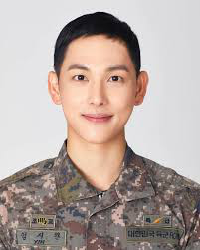

In [0]:
image = Image.open(test_dog[1])
resize_image = image.resize((200,250))
resize_image

In [0]:
from PIL import Image
import numpy as np


cat_t_resize=[]
for i in range(10):
  image = Image.open(path_list[i])
  resize_image = np.array(image.resize((300,300)))
  cat_t_resize.append(resize_image)

dog_t_resize=[]
for i in range(10):
  image = Image.open(dog_path_list[i])
  resize_image = np.array(image.resize((300,300)))
  dog_t_resize.append(resize_image)


cat_test_resize=[]
for i in range(3):
  image = Image.open(test_cat[i])
  resize_image = np.array(image.resize((300,300)))
  cat_test_resize.append(resize_image)

dog_test_resize=[]
for i in range(3):
  image = Image.open(test_dog[i])
  resize_image = np.array(image.resize((300,300)))
  dog_test_resize.append(resize_image)  

In [0]:
train_tensorlist=[]
for i in range(10):  
  ee=(torch.FloatTensor(cat_t_resize[i]).reshape([3,300,300]),0)
  ff=(torch.FloatTensor(dog_t_resize[i]).reshape([3,300,300]),1)
  train_tensorlist.append(ee)
  train_tensorlist.append(ff)
  

test_tensorlist=[]
for i in range(3):  
  ee=(torch.FloatTensor(cat_test_resize[i]).reshape([3,300,300]),0)
  ff=(torch.FloatTensor(dog_test_resize[i]).reshape([3,300,300]),1)
  test_tensorlist.append(ee)
  test_tensorlist.append(ff)
 

In [0]:
train_loader = torch. utils.data.DataLoader(dataset = train_tensorlist, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset = test_tensorlist, batch_size=batch_size, shuffle=True)

In [0]:
def train(model, train_loader):
  model.train()
  
  optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)
  losses = []
  for i, (image, label) in enumerate(train_loader):
    
    if use_cuda:
      image = image.cuda()
      label = label.cuda()
      

    pred_label = model(image)
    loss = criterion(pred_label, label)
    losses.append(loss.item())
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
  avg_loss = sum(losses)/len(losses)
  return avg_loss

In [0]:
def eval(model, test_loader):
  model.eval()
  device = next(model.parameters()).device.index
  
  total_cnt = 0
  correct_cnt = 0
  
  for i,(image, label) in enumerate(test_loader):
    if use_cuda:
      image = image.cuda()
      label = label.cuda()
      
      
      out = model(image)
      _, pred_label = torch.max(out.data, 1)
      total_cnt += image.data.size()[0]
      correct_cnt +=(pred_label == label.data).sum().item()
      
  return correct_cnt/ total_cnt

In [0]:
#Resnet

class SimpleResNet(nn.Module):
  def __init__(self):
    super(SimpleResNet, self).__init__()
    self.conv1 = nn.Conv2d(3,64, kernel_size=(3,3), padding=(1,1))
    self.act1 = nn.ReLU()
    self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
    

    self.conv2 = nn.Conv2d(64,128, kernel_size=(3,3), padding=(1,1))
    self.act2 = nn.ReLU()
    self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
    
    
    self.conv3_1 = nn.Conv2d(128,256, kernel_size=(3,3), padding=(1,1))
    self.act3_1 = nn.ReLU()
    self.conv3_2 = nn.Conv2d(256,256, kernel_size=(3,3), padding=(1,1))
    self.act3_2 = nn.ReLU()
    self.conv3_3 = nn.Conv2d(256,256, kernel_size=(3,3), padding=(1,1))
    self.act3_3 = nn.ReLU()   
    self.pool3 = nn.MaxPool2d(kernel_size=2, stride=2)
    
    self.conv4_1 = nn.Conv2d(256, 512, kernel_size=(3,3), padding=(1,1))
    self.act4_1=nn.ReLU()
    self.conv4_2 = nn.Conv2d(512, 512, kernel_size=(3,3), padding=(1,1))
    self.act4_2=nn.ReLU()
    self.conv4_3 = nn.Conv2d(512, 512, kernel_size=(3,3), padding=(1,1))
    self.act4_3=nn.ReLU()
    self.pool4 = nn.AvgPool2d(kernel_size=2, stride=2)  
    
    
    self.fc1  = nn.Linear(165888, 512)
    self.act5 = nn.ReLU()
    self.out = nn.Linear(512,2)

    
    
  def forward(self, x):
    x1 = x
    x2 = self.act1(self.conv1(x1))
    x3 = self.pool1(x2)

    x4 = self.act2(self.conv2(x3))
    x5 = self.pool2(x4)

    x6 = self.act3_1(self.conv3_1(x5))
    x7 = self.act3_1(self.conv3_2(x6))
    x8 = self.act3_1(self.conv3_3(x7)+ x6 ) 
    x9 = self.pool3(x8)

    x10 = self.act4_1(self.conv4_1(x9))
    x11 = self.act4_2(self.conv4_2(x10))
    x12 = self.act4_3(self.conv4_3(x11) + x10) 
    x13 = self.pool4(x12)

    x14 = x13.view(-1, 165888) 

    x15 = self.act5(self.fc1(x14))

    out = self.out(x15)
    return out
  


resnet_model = SimpleResNet().cuda()
train_loss_lst = []
test_accuracy_lst = []
for epoch in range(total_epoch):
  train_loss = train(resnet_model, train_loader)
  train_loss_lst.append(train_loss)
  test_accuracy = eval(resnet_model, test_loader)
  test_accuracy_lst.append(test_accuracy)
  
  print(test_accuracy)
  
  
summary(resnet_model, input_size=(3,300,300))

0.5
0.5
0.5
0.5
0.5
0.5
0.6666666666666666
0.5
0.6666666666666666
1.0
0.5
0.5
0.6666666666666666
0.8333333333333334
0.6666666666666666
0.6666666666666666
0.5
0.8333333333333334
0.8333333333333334
0.6666666666666666
0.5
1.0
0.6666666666666666
0.6666666666666666
0.8333333333333334
0.6666666666666666
0.6666666666666666
0.6666666666666666
0.6666666666666666
0.6666666666666666
0.6666666666666666
0.6666666666666666
0.6666666666666666
0.6666666666666666
0.6666666666666666
1.0
0.6666666666666666
0.6666666666666666
0.6666666666666666
0.8333333333333334
0.6666666666666666
0.6666666666666666
0.6666666666666666
0.6666666666666666
0.6666666666666666
0.6666666666666666
0.6666666666666666
0.6666666666666666
0.6666666666666666
0.6666666666666666
0.6666666666666666
0.8333333333333334
0.6666666666666666
0.6666666666666666
0.6666666666666666
0.6666666666666666
0.6666666666666666
0.6666666666666666
0.6666666666666666
0.6666666666666666
0.6666666666666666
0.6666666666666666
0.6666666666666666
0.66666666666

In [0]:
#VGG

class SimpleVGG(nn.Module):
  def __init__(self):
    super(SimpleVGG, self).__init__()
    self.conv1 = nn.Conv2d(3,64, kernel_size=(3,3), padding=(1,1))
    self.act1 = nn.ReLU()
    self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
    

    self.conv2 = nn.Conv2d(64,128, kernel_size=(3,3), padding=(1,1))
    self.act2 = nn.ReLU()
    self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
    
    
    self.conv3_1 = nn.Conv2d(128,256, kernel_size=(3,3), padding=(1,1))
    self.act3_1 = nn.ReLU()
    self.conv3_2 = nn.Conv2d(256,256, kernel_size=(3,3), padding=(1,1))
    self.act3_2 = nn.ReLU()
    self.conv3_3 = nn.Conv2d(256,256, kernel_size=(3,3), padding=(1,1))
    self.act3_3 = nn.ReLU()   
    self.pool3 = nn.MaxPool2d(kernel_size=2, stride=2)
    
    self.conv4_1 = nn.Conv2d(256, 512, kernel_size=(3,3), padding=(1,1))
    self.act4_1=nn.ReLU()
    self.conv4_2 = nn.Conv2d(512, 512, kernel_size=(3,3), padding=(1,1))
    self.act4_2=nn.ReLU()
    self.conv4_3 = nn.Conv2d(512, 512, kernel_size=(3,3), padding=(1,1))
    self.act4_3=nn.ReLU()
    self.pool4 = nn.AvgPool2d(kernel_size=2, stride=2)  
    
    
    self.fc1  = nn.Linear(165888, 512)
    self.act5 = nn.ReLU()
    self.out = nn.Linear(512,2)

    
    
  def forward(self, x):
    x1 = x
    x2 = self.act1(self.conv1(x1))
    x3 = self.pool1(x2)

    x4 = self.act2(self.conv2(x3))
    x5 = self.pool2(x4)

    x6 = self.act3_1(self.conv3_1(x5))
    x7 = self.act3_1(self.conv3_2(x6))
    x8 = self.act3_1(self.conv3_3(x7)) #이 부분이 ResNet과 다름
    x9 = self.pool3(x8)

    x10 = self.act4_1(self.conv4_1(x9))
    x11 = self.act4_2(self.conv4_2(x10))
    x12 = self.act4_3(self.conv4_3(x11)) #이 부분이 ResNet과 다름
    x13 = self.pool4(x12)

    x14 = x13.view(-1, 165888) #2*2*512 계산하면 됨

    x15 = self.act5(self.fc1(x14))

    out = self.out(x15)
    return out
  


vgg_model = SimpleVGG().cuda()
train_loss_lst = []
test_accuracy_lst = []
for epoch in range(total_epoch):
  train_loss = train(vgg_model, train_loader)
  train_loss_lst.append(train_loss)
  test_accuracy = eval(vgg_model, test_loader)
  test_accuracy_lst.append(test_accuracy)
  
  print(test_accuracy)
  
  
summary(vgg_model, input_size=(3,300,300))

0.6666666666666666
0.5
0.5
0.5
0.8333333333333334
1.0
0.5
0.5
0.5
1.0
0.5
0.5
0.5
0.5
0.8333333333333334
0.5
0.8333333333333334
0.8333333333333334
0.8333333333333334
0.6666666666666666
0.5
0.8333333333333334
0.5
0.6666666666666666
1.0
1.0
0.5
0.5
0.5
0.6666666666666666
0.5
0.5
0.8333333333333334
1.0
0.6666666666666666
1.0
0.6666666666666666
0.5
0.5
0.5
0.6666666666666666
0.5
0.5
0.5
0.6666666666666666
0.5
1.0
0.5
0.5
0.5
0.5
0.5
0.5
0.5
1.0
1.0
0.5
0.5
0.5
1.0
1.0
0.5
0.5
0.5
0.5
0.5
0.8333333333333334
0.5
0.5
0.6666666666666666
0.5
0.5
0.5
0.6666666666666666
0.8333333333333334
0.6666666666666666
0.5
0.8333333333333334
0.5
0.6666666666666666
0.6666666666666666
0.6666666666666666
0.6666666666666666
0.6666666666666666
0.6666666666666666
0.6666666666666666
0.6666666666666666
0.6666666666666666
0.6666666666666666
0.6666666666666666
0.6666666666666666
0.6666666666666666
0.5
0.6666666666666666
0.6666666666666666
0.6666666666666666
0.6666666666666666
0.6666666666666666
0.6666666666666666
0.66